## 1. 데이터 준비

In [2]:
import pandas as pd
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
df = pd.read_csv('D:\강의\텍스트마이닝(16시간)\영어 크롤링.csv')
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,Wonderful,0
7146,"January 12, 2020",luis arias,5,Wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,Awesome 🌟 🌟 🌟 🌟,0
7148,"October 13, 2017",A Google user,5,Good Good Good,0


##### ♦️1. 실습예제
- 리뷰가 30글자 미만인 데이터 제거
- 추가 전처리를 적용한 코드 작성
- 정규표현식을 이용해 이모티콘 및 특수문자제거
- 명사, 동사 불용어제거까지 적용된 document 리스트 만들기

* #명사(NN, NNS, NNP, NNPS)
* #동사(VB, VBD, VBG, VBN, VBP, VBZ)

In [8]:
df = df[df['Review'].apply(lambda x: len(x) > 30)]
df = df.reset_index(drop=True)
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1
...,...,...,...,...,...
4816,"October 2, 2017",repou Ltd,1,"Can't even open the app, crashes.",0
4817,"July 22, 2018",jayanth murli,5,It is well helpfull for my reference this appl...,0
4818,"May 29, 2018",Mukul,1,It's not installing showing a 505 error....,0
4819,"January 8, 2017",Jumar Ando,5,This is every usable apps tnx Lg,0


In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
import re

In [20]:
def pos_tagging(string):
    eng = re.compile('[^a-zA-Z]') #알파벳만 남기고 지우기_특수문자 제거
    string = re.sub(eng, ' ', string)

    eng2 = re.compile(r'\s+') 
    string = re.sub(eng2, ' ', string) #중복 공백 제거

    #불용어처리
    string = string.lower() #소문자 변환
    string = nltk.word_tokenize(string)
    string  = nltk.pos_tag(string) #형태소 태깅

    #품사뽑기
    result = [word for word, tag in string if word not in stopwords if tag in {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}]
    return result

In [22]:
pos_tagging(df['Review'][0])

['experience',
 'paid',
 'money',
 'get',
 'air',
 'conditioner',
 'connectivity',
 'work',
 'times',
 'try',
 'use',
 'gets',
 'connect',
 'device',
 'takes',
 'minute',
 'get',
 'disconnected',
 'reinstalling',
 'app',
 'cleared',
 'cache',
 'reset',
 'router',
 'replaced',
 'router',
 'nothing',
 'works',
 'frustrated']

In [24]:
df['tagged_pos'] = df['Review'].apply(lambda x : pos_tagging(x) )

In [38]:
df = df[df['tagged_pos'].apply(lambda x : len(x) != 0)]
df = df.reset_index(drop=True)
df

,Date,Name,Score,Review,like,tagged_pos
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7,"[experience, paid, money, get, air, conditione..."
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8,"[features, think, connect, device, give, ux, d..."
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2,"[app, works, allowed, download, cycles, washer..."
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1,"[app, lg, interface, adjustments, user, downlo..."
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1,"[app, requires, updates, wifi, setup, took, ap..."
...,...,...,...,...,...,...
4790,"May 11, 2018",A Google user,5,It is very good and useful app in my lifr,0,"[app, lifr]"
4791,"October 2, 2017",repou Ltd,1,"Can't even open the app, crashes.",0,"[open, app, crashes]"
4792,"July 22, 2018",jayanth murli,5,It is well helpfull for my reference this appl...,0,"[reference, application, application]"
4793,"May 29, 2018",Mukul,1,It's not installing showing a 505 error....,0,"[installing, showing, error]"


In [40]:
tagged_pos_document = df['tagged_pos']
tagged_pos_document

0       [experience, paid, money, get, air, conditione...
1       [features, think, connect, device, give, ux, d...
2       [app, works, allowed, download, cycles, washer...
3       [app, lg, interface, adjustments, user, downlo...
4       [app, requires, updates, wifi, setup, took, ap...
                              ...                        
4790                                          [app, lifr]
4791                                 [open, app, crashes]
4792                [reference, application, application]
4793                         [installing, showing, error]
4794                                      [apps, tnx, lg]
Name: tagged_pos, Length: 4795, dtype: object

### 1.1 추가 전처리 (lemmatizer or stemmer)
- lemmatizer : 어근을 찾아 원형변형, 표제어로 변경 (running -> run, better -> good)
- stemmer : 어간 추출을 통해 접미사를 제거 (처리속도가 빠르지만 의미왜곡 우려)

In [117]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [119]:
# nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print('* 적용 전 * \n' ,df['tagged_pos'][0] , '\n')

print('* lemmatizer 적용 *')
print([lemmatizer.lemmatize(word) for word in df['tagged_pos'][0]], '\n')

print("* stemmer 적용 *")
print([stemmer.stem(word) for word in df['tagged_pos'][0]])

* 적용 전 * 
 ['experience', 'paid', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'times', 'try', 'use', 'gets', 'connect', 'device', 'takes', 'minute', 'get', 'disconnected', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'works', 'frustrated'] 

* lemmatizer 적용 *
['experience', 'paid', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'time', 'try', 'use', 'get', 'connect', 'device', 'take', 'minute', 'get', 'disconnected', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'work', 'frustrated'] 

* stemmer 적용 *
['experi', 'paid', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'minut', 'get', 'disconnect', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'frustrat']


## 2. LDA 데이터 세팅

In [45]:
import gensim
from gensim import corpora, models #모델 가져오기

In [47]:
dictionary = corpora.Dictionary(tagged_pos_document)

In [49]:
dictionary.token2id

{'air': 0,
 'app': 1,
 'cache': 2,
 'cleared': 3,
 'conditioner': 4,
 'connect': 5,
 'connectivity': 6,
 'device': 7,
 'disconnected': 8,
 'experience': 9,
 'frustrated': 10,
 'get': 11,
 'gets': 12,
 'minute': 13,
 'money': 14,
 'nothing': 15,
 'paid': 16,
 'reinstalling': 17,
 'replaced': 18,
 'reset': 19,
 'router': 20,
 'takes': 21,
 'times': 22,
 'try': 23,
 'use': 24,
 'work': 25,
 'works': 26,
 'burner': 27,
 'connected': 28,
 'directions': 29,
 'effort': 30,
 'features': 31,
 'fit': 32,
 'give': 33,
 'image': 34,
 'look': 35,
 'match': 36,
 'personalizing': 37,
 'product': 38,
 'purchased': 39,
 'put': 40,
 'rate': 41,
 'represent': 42,
 'see': 43,
 'start': 44,
 'stove': 45,
 'think': 46,
 'used': 47,
 'ux': 48,
 'written': 49,
 'allowed': 50,
 'bothering': 51,
 'consumed': 52,
 'cool': 53,
 'cycles': 54,
 'download': 55,
 'dryer': 56,
 'electricity': 57,
 'info': 58,
 'kind': 59,
 'know': 60,
 'kwh': 61,
 'make': 62,
 'monitoring': 63,
 'power': 64,
 'problems': 65,
 'rating'

In [51]:
#ID랑 매칭
corpus = [dictionary.doc2bow(doc) for doc in tagged_pos_document]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(5, 1),
  (7, 3),
  (9, 1),
  (23, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(1, 1),
  (9, 1),
  (26, 1),
  (31, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(1, 1),
  (54, 3),
  (56, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
 

In [53]:
print(corpus[0])
print(tagged_pos_document[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]
['experience', 'paid', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'times', 'try', 'use', 'gets', 'connect', 'device', 'takes', 'minute', 'get', 'disconnected', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'works', 'frustrated']


## 3. LDA 토픽 수 설정하기

In [55]:
top_n = 3 #토픽 수 

#모델 생성
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=top_n, id2word=dictionary)

In [59]:
ldamodel.print_topics(num_words=10) #토픽별 주제 단어보기

[(0,
  '0.021*"lg" + 0.016*"app" + 0.014*"working" + 0.013*"washer" + 0.010*"dryer" + 0.010*"get" + 0.009*"run" + 0.009*"work" + 0.009*"connect" + 0.007*"diagnosis"'),
 (1,
  '0.050*"app" + 0.018*"lg" + 0.011*"washer" + 0.011*"cycle" + 0.009*"connect" + 0.009*"product" + 0.009*"want" + 0.008*"dryer" + 0.008*"register" + 0.007*"get"'),
 (2,
  '0.079*"app" + 0.022*"phone" + 0.019*"work" + 0.017*"washer" + 0.015*"use" + 0.015*"lg" + 0.014*"machine" + 0.011*"dryer" + 0.010*"permissions" + 0.010*"washing"')]

## 4. LDA 토픽 수 찾기
- Coherence & perplexity
  * Coherence : 0~1 (클수록 굳)
  * Perplexity : 음수일수록 (작을수록 굳) 

In [61]:
#coherence
from gensim.models import CoherenceModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)

coherencemodel = CoherenceModel(model = ldamodel,
                               texts = tagged_pos_document,
                               dictionary = dictionary)

In [63]:
coherence_score = coherencemodel.get_coherence()

In [65]:
coherence_score

0.4619042384100201

In [67]:
#perplexity
ldamodel.log_perplexity(corpus)

-7.108263874099071

In [73]:
import matplotlib.pyplot as plt

In [75]:
from tqdm import tqdm

c_score = []
p_score = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)

    #coherence
    coherencemodel = CoherenceModel(model = ldamodel,
                                   texts = tagged_pos_document,
                                   dictionary = dictionary)

    c_score.append(coherencemodel.get_coherence())

    #perplexity
    p_score.append(ldamodel.log_perplexity(corpus))

100%|██████████| 8/8 [02:19<00:00, 17.39s/it]


### 4.1 Coherence

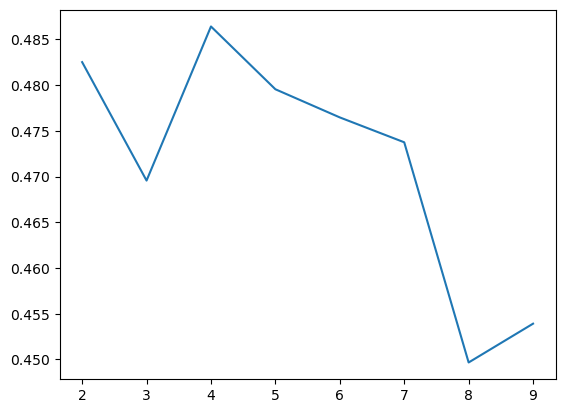

In [77]:
x = range(2,10)
plt.plot(x, c_score)
plt.show()

### 4.2 Perplexity

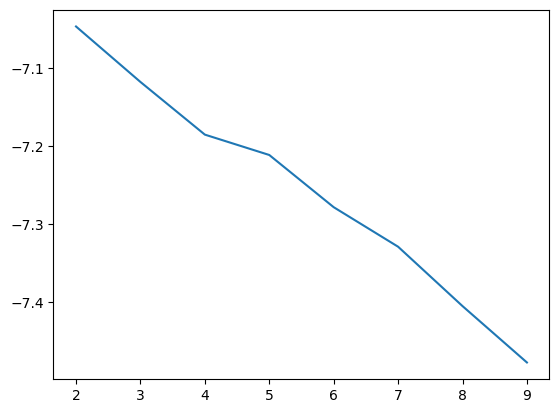

In [79]:
x = range(2,10)
plt.plot(x, p_score)
plt.show()

### 4.3 설정된 토픽 수로 LDA 적용

In [81]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary)

In [111]:
lda_model.get_document_topics(corpus)[0]

[(0, 0.6549886), (2, 0.2810594), (3, 0.05493576)]

label = [2,3]
value = [0.7, 0.2]

In [105]:
import numpy as np

In [107]:
topic_list=[]
for doc in lda_model.get_document_topics(corpus):
    label = []
    value =[]
    for topic, percent in doc:
        label.append(topic)
        value.append(percent)

    index = np.argmax(value)
    topic_list.append(label[index])

In [113]:
df['topic'] = topic_list
df

,Date,Name,Score,Review,like,tagged_pos,topic
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7,"[experience, paid, money, get, air, conditione...",0
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8,"[features, think, connect, device, give, ux, d...",1
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2,"[app, works, allowed, download, cycles, washer...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1,"[app, lg, interface, adjustments, user, downlo...",2
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1,"[app, requires, updates, wifi, setup, took, ap...",2
...,...,...,...,...,...,...,...
4790,"May 11, 2018",A Google user,5,It is very good and useful app in my lifr,0,"[app, lifr]",2
4791,"October 2, 2017",repou Ltd,1,"Can't even open the app, crashes.",0,"[open, app, crashes]",2
4792,"July 22, 2018",jayanth murli,5,It is well helpfull for my reference this appl...,0,"[reference, application, application]",1
4793,"May 29, 2018",Mukul,1,It's not installing showing a 505 error....,0,"[installing, showing, error]",2


In [115]:
lda_model.print_topics(num_words=8)

[(0,
  '0.072*"app" + 0.022*"machine" + 0.018*"lg" + 0.017*"washing" + 0.017*"work" + 0.014*"washer" + 0.013*"use" + 0.013*"time"'),
 (1,
  '0.037*"app" + 0.032*"phone" + 0.015*"permissions" + 0.015*"access" + 0.014*"lg" + 0.013*"connect" + 0.010*"use" + 0.010*"make"'),
 (2,
  '0.072*"app" + 0.023*"washer" + 0.018*"dryer" + 0.016*"work" + 0.015*"download" + 0.014*"lg" + 0.011*"use" + 0.010*"get"'),
 (3,
  '0.051*"app" + 0.021*"lg" + 0.010*"works" + 0.009*"work" + 0.009*"phone" + 0.009*"time" + 0.009*"washer" + 0.009*"connect"')]